<a href="https://colab.research.google.com/github/Rohitsawant0123/Loan_eligibility_prediction/blob/main/ML_Model_using_Python_and_Dash_(a_UI_framework).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**An End-to-End Machine Learning Model is a comprehensive system that contains all the stages of a machine learning project, from data collection and preprocessing to model development, deployment, and ongoing maintenance**

To build an end-to-end Machine Learning model, you first need to train a Machine Learning model
Once you have trained your model, below is the process you can follow to turn your Machine Learning model into an end-to-end solution using the dash framework:
1. Set up a new Dash application.
2. Create the layout of the app using Dash’s HTML and Core Components. It includes input fields, buttons, and output display areas.
3. Write callback functions to define the interactivity of the app, such as taking user inputs, running the model prediction, and displaying the results.
4. Load the model within the app to use for predictions.**bold text**

In [16]:
#import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#load dataset
real_estate_data=pd.read_csv('Real_Estate.csv')
real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [18]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [19]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [20]:
# Descriptive statistics
real_estate_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


<ipython-input-21-f4b8e30b0c9a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



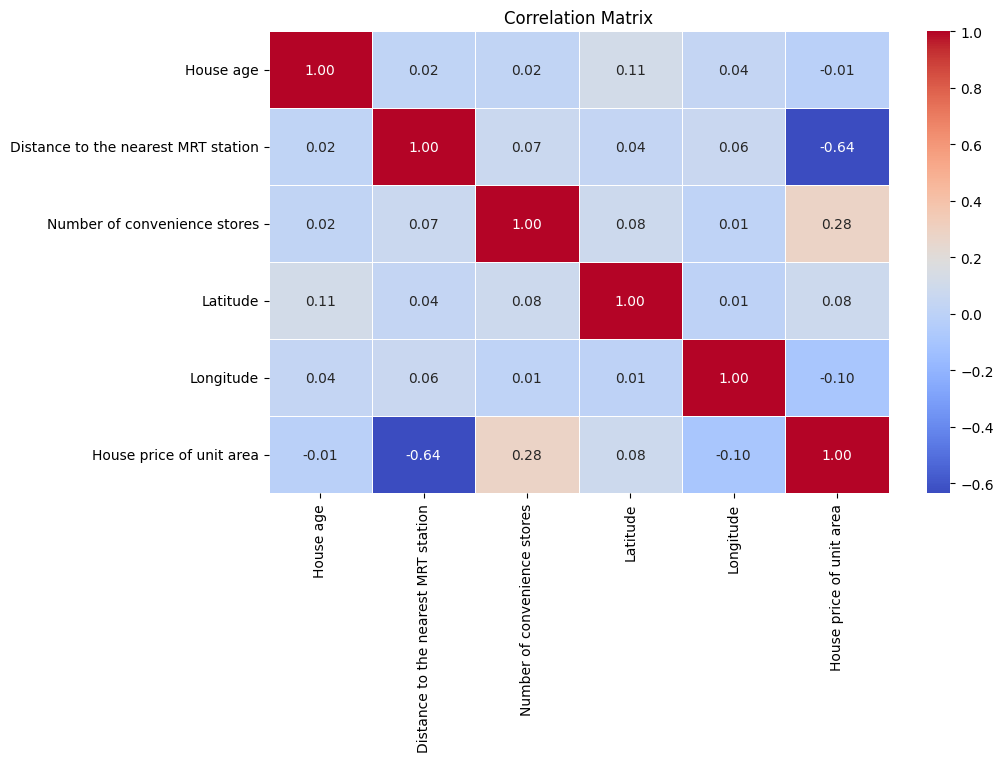

In [21]:
# Correlation matrix
correlation_matrix = real_estate_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

# Now, let's build a regression model to predict the real estate prices by using the Linear Regression algorithm:

In [22]:
# Selecting features and target variable
features=['Distance to the nearest MRT station','Number of convenience stores', 'Latitude', 'Longitude']
target='House price of unit area'

X=real_estate_data[features]
y=real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)


LinearRegression()

# **Now, here’s how we can create an end-to-end solution for our Machine Learning model by using the dash framework**

In [23]:
!pip install dash
import dash
from dash import html,dcc, Input, Output ,State
#Dash is the main Dash library. The html and dcc (Dash Core Components) are used to create HTML and interactive components.
#The Input, Output, and State are used for creating callbacks in Dash (interactivity).

In [24]:
# Initialize the Dash app
app=dash.Dash(__name__)

In [ ]:
# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),

        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),

        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])
# HTML structure of the app using Dash’s HTML components. Our layout includes a title (html.H1)
#input fields for the distance to the MRT station, number of convenience stores, latitude, and longitude (dcc.Input), and a button to trigger the prediction (html.Button).


# Define callback to update output(PREDICTION RESULT)
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'),
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
#It’s a callback function that updates the output (prediction result) when the ‘Predict Price’ button is clicked.
#Output(‘prediction_output’, ‘children’) indicates that the inner content (children) of the component with id prediction_output will be updated by this callback.


##The callback takes the number of button clicks as Input and the values of the four input fields as State.
#The function update_output is executed when the button is clicked, using the input values to generate a prediction.
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]],
                                columns=['distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''



#Inside the update_output function,
#The inputs are first checked to ensure they are not None. The inputs are then arranged into a Pandas DataFrame, matching the expected format for the model.
#The model.predict method is called to generate a prediction. This assumes that a trained model named model exists and is accessible within this script.
#The function returns either the predicted price or a prompt to enter all values.


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)



#This part runs the app server when the script is executed directly (__name__ == ‘__main__’).
#Debug=True enables the debug mode, which provides an interactive debugger in the browser and auto-reloads the server on code changes.

# **Summary**

**An End-to-End Machine Learning Model is a comprehensive system that contains all the stages of a machine learning project, from data collection and preprocessing to model development, deployment, and ongoing maintenance. I hope you liked this article on how to build an end-to-end Machine Learning model using Python.**